In [1]:
from ipywidgets import interact
import fabio
from skimage.measure import compare_ssim as ssim
import cv2
import PyMca5 as mca
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

edfdir = '/Users/ezatterin/Documents/UCL_phd/data/ESRF/HC_2615/detector/align2/'
specdir = '/Users/ezatterin/Documents/UCL_phd/data/ESRF/HC_2615/spec/'

In [3]:
def acf_fft(f):
    N = len(f)
    fvi = np.fft.fft(f, n=2*N)
    acf =  fvi*np.conjugate(fvi)
    acf = np.fft.ifft(acf)[:N].real/N
    return acf

In [4]:
# Load images
scan_numbers = [18]
scan_total = []

for scan_no in scan_numbers:
    
    # Load specfile
    sf = mca.specfilewrapper.Specfile(specdir+'align2.spec')
    # Specify scan number and load it
    scan = sf[scan_no-1]
    # Find out how many images the scan contains
    edf_num = scan.alllabels().index('mpx4inr')
    img_num = scan.data()[edf_num].shape[0]
    # Find the filename of the first edf file of the scan
    fname0 = scan.header('ULIMA')[0].split('/')[-1]
    # Load the first edf file
    edf0 = fabio.open(edfdir + fname0)
    # Load the rest of the edf files in the scan and place them in an array
    scan_all = [edf0]
    for n in range(img_num-1):
        scan_all.append(scan_all[n].next())
    scan_all = np.array(scan_all)
    scan_total.append(scan_all)

# Stack images and correct for 0 intensity
img_array = scan_total[0]
img_array_list = []
for entry in img_array:
    img_array_list.append(entry.data)
img_array_list = tuple(img_array_list)
stack = np.dstack(img_array_list) + 0.1

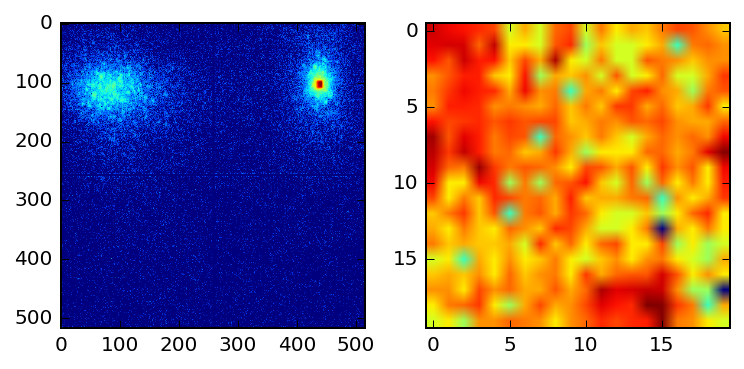

In [5]:
# Select a ROI and visualise it

i1, i2 = 100,120
j1, j2 = 100,120
roi = stack[i1:i2,j1:j2,0]

plt.subplot(1,2,1)
plt.imshow(np.log(stack[:,:,0]))
plt.subplot(1,2,2)
plt.imshow(np.log(roi)); 

The ACF for a ROI of 4 px

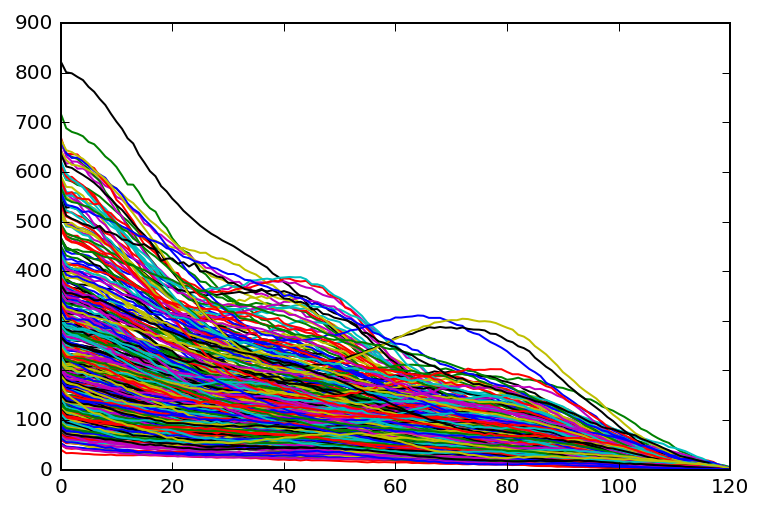

In [8]:
acf_3d = np.array([])

for row in range(i1, i2):
    for pixel in range(j1, j2):
        plt.plot(acf_fft(stack[row, pixel]))

Average it:

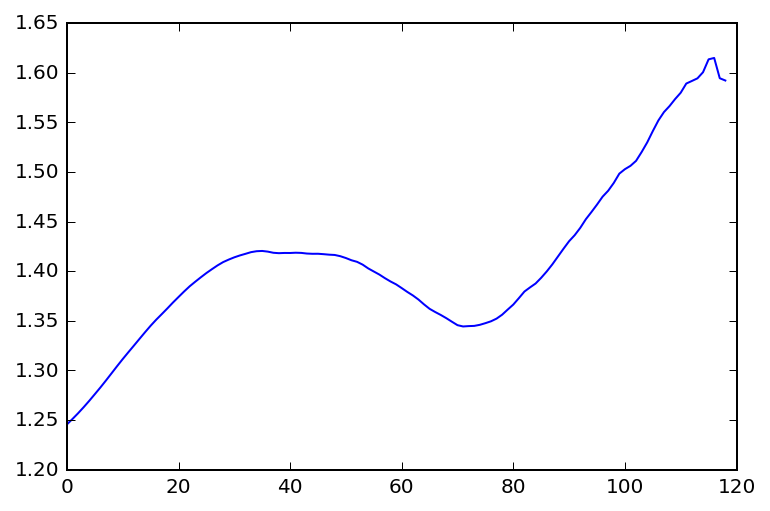

In [205]:
acf_3d = np.array([])

for row in range(i1, i2):
    for pixel in range(j1, j2):
        acf_3d = np.append(acf_3d, acf1d(stack[row, pixel]))
        
acf_3d = acf_3d.reshape(20,20,119)
acf_3d_av = acf_3d.sum(axis=0).sum(axis=0)/(acf_3d.shape[0]*acf_3d.shape[1])
plt.plot(acf_3d_av);

Is the above the same if I manually take that pixel?

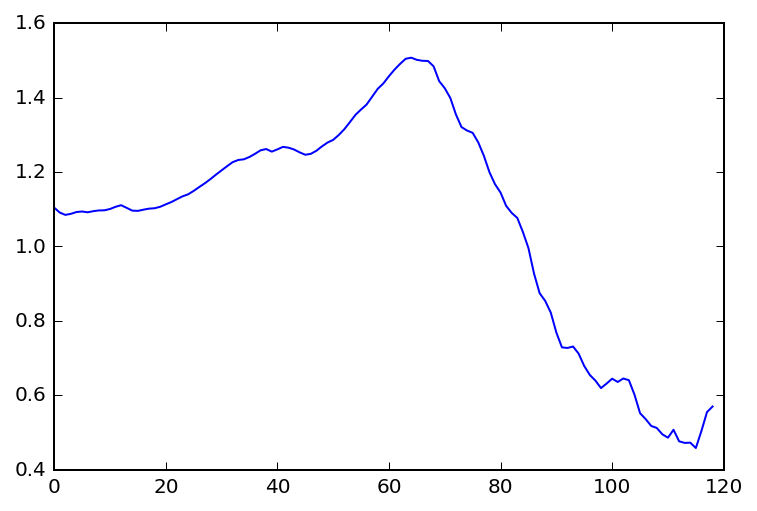

In [200]:
plt.plot(acf1d(stack[100,100]))

Is it the same if I don't stack the images?

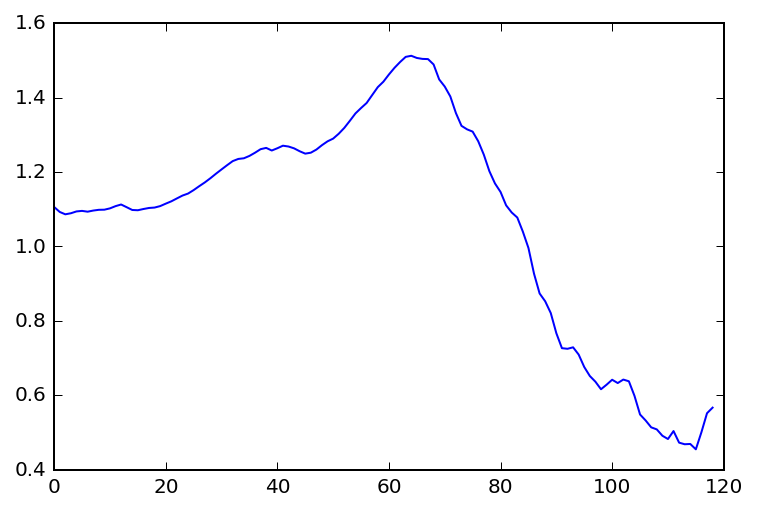

In [201]:
pixel_time = []
for image in img_array:
    pixel_time.append(image.data[100,100])
plt.plot(acf1d(pixel_time))

The following averages over the given ROI.

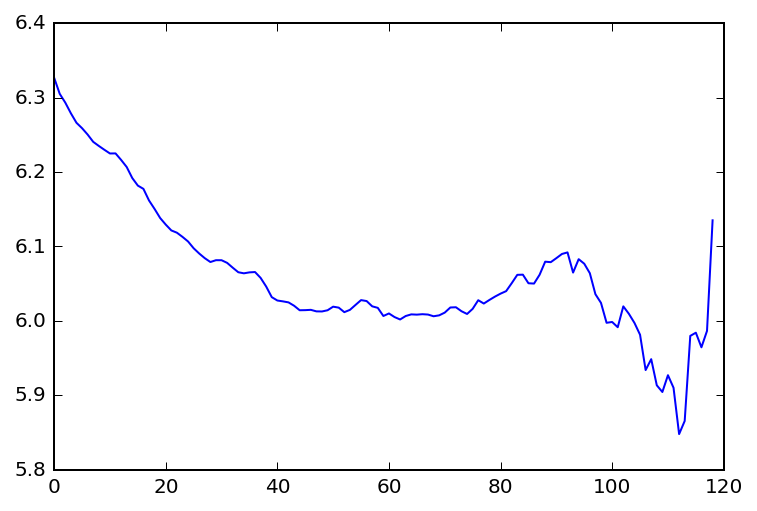

In [231]:
# Calculate the 1D ACF for the ROI selected along the time direction
acf_3d = np.array([])

for row in range(i1,i2):
    for pixel in range(j1,j2):
        acf_3d = np.append(acf_3d,acf1d(stack[row,pixel,:]))

acf_3d = acf_3d.reshape(roi.shape[0],roi.shape[1],stack.shape[2]-2)

plt.plot(ls.sum(axis=0).sum(axis=0)/(acf_3d.shape[0]*acf_3d.shape[1]));